# Titanic data for Kaggle

In [3]:
!pwd

/c/Users/A547184/Git/Repos/python-cronicals/ML/Titanic-Kaggle


In [4]:
import pandas as pd
import numpy as np
import os

raw_data_path = os.path.join(os.path.curdir)
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')

train_df1 = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

In [5]:
test_df['Survived'] = -888

In [6]:
train_df2 = pd.concat((train_df1, test_df),axis=0,sort=True)

In [7]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
Survived    418 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [9]:
train_df2.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [10]:
# dispersion measures
print('Min fare : {0}'.format(train_df2.Fare.min())) # minimum
print('Max fare : {0}'.format(train_df2.Fare.max())) # maximum
print('Fare range : {0}'.format(train_df2.Fare.max()  - train_df2.Fare.min())) # range
print('25 percentile : {0}'.format(train_df2.Fare.quantile(.25))) # 25 percentile
print('50 percentile : {0}'.format(train_df2.Fare.quantile(.5))) # 50 percentile
print('75 percentile : {0}'.format(train_df2.Fare.quantile(.75))) # 75 percentile
print('Variance fare : {0}'.format(train_df2.Fare.var())) # variance
print('Standard deviation fare : {0}'.format(train_df2.Fare.std())) # standard deviation

Min fare : 0.0
Max fare : 512.3292
Fare range : 512.3292
25 percentile : 7.8958
50 percentile : 14.4542
75 percentile : 31.275
Variance fare : 2678.959737892891
Standard deviation fare : 51.75866823917411


## 1. EDA (Exploratory Data Analysis)

### 1.a Univeriate Distribution (Centrality Measure)

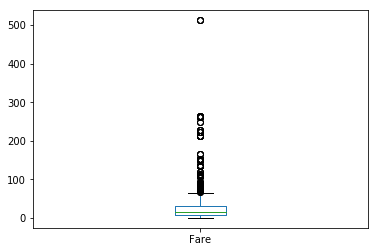

In [11]:
%matplotlib inline
train_df2.Fare.plot(kind='box')

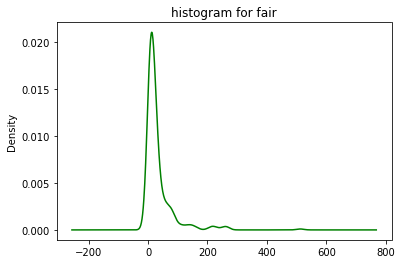

In [12]:
#train_df.Fare.plot(kind='hist', title='histogram for fair', color='g');
train_df2.Fare.plot(kind='kde', title='histogram for fair', color='g');

### 1.b Bivariate distribution

##### 1.b.1 Scatter plot

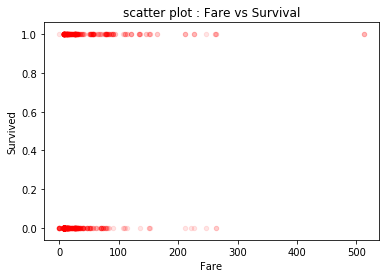

In [13]:
train_df2[train_df2['Survived']!=-888].plot.scatter(x='Fare', y='Survived', color='r', title='scatter plot : Fare vs Survival', alpha= 0.1);

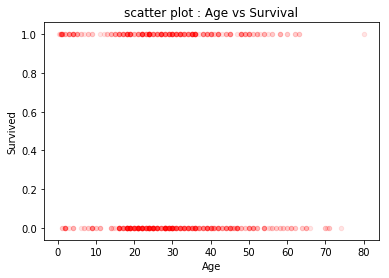

In [14]:
train_df2[train_df2['Survived']!=-888].plot.scatter(x='Age', y='Survived', color='r', title='scatter plot : Age vs Survival', alpha= 0.1);

In [15]:
# train_df.loc[0:5, ['Sex', 'Survived']]
# train_df.loc[0:5, :]
mothers_df = train_df2.loc[  (train_df2['Sex'] == 'female') 
                          & (train_df2['Parch'] > 0) 
                          & (train_df2['Age'] > 18.00) , ['Sex', 'Age', 'Parch', 'Survived']]
print('Mothers : ', len(mothers_df))

Mothers :  97


In [16]:
train_df2['isMother'] = np.where((train_df2['Sex'] == 'female') & (train_df2['Parch'] > 0) & (train_df2['Age'] > 18.00), 1, 0)
train_df2['isMother'].value_counts()

0    1212
1      97
Name: isMother, dtype: int64

##### 1.b.2 Cross-tab for categorical features ploting

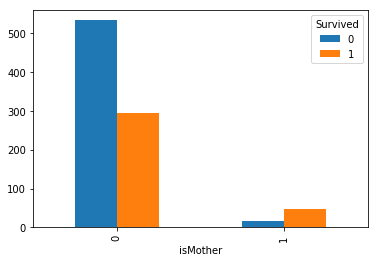

In [17]:
# train_df.plot.scatter(x='Parch', y='isMother', color='r', title='scatter plot : Chield vs Mother', alpha= 0.05);
pd.crosstab(train_df2[train_df2['Survived']!=-888]['isMother'], train_df2[train_df2['Survived']!=-888]['Survived']).plot(kind='bar');

In [18]:
#pd.crosstab(train_df['isMother'], train_df['Survived'])
pd.crosstab(train_df2[train_df2['Survived']!=-888]['isMother'], train_df2[train_df2['Survived']!=-888]['Survived'])

Survived,0,1
isMother,,
0,533,294
1,16,48


In [19]:
# train_df.groupby('isMother').Survived.value_counts()
# Show percentage
train_df2[train_df2['Survived']!=-888].groupby('isMother').Survived.value_counts(normalize=True)

isMother  Survived
0         0           0.644498
          1           0.355502
1         1           0.750000
          0           0.250000
Name: Survived, dtype: float64

In [20]:
train_df2.groupby('isMother')['Age'].mean()

isMother
0    29.316828
1    35.402062
Name: Age, dtype: float64

In [21]:
train_df2.groupby('isMother').agg({'Age':'median','Fare':'mean' })

,Age,Fare
isMother,,
0,28.0,30.292478
1,34.0,70.786554


## 2. Missing Values


In [22]:
# use .info() to detect missing values (if any)
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
isMother    1309 non-null int32
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 127.8+ KB


### 2.a Embarked column - Fill missing value with a default(clever) value

In [23]:
# extract rows with Embarked as Null
train_df2[train_df2.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,isMother
PassengerId,,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572,0
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572,0


In [24]:
train_df2.groupby(['Pclass', 'Embarked'])['Fare'].median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [25]:
# replace the missing values with 'C'
#train_df2.Embarked.fillna('C', inplace=True)
train_df2.loc[train_df2.Embarked.isnull(), 'Embarked'] ='C'

### 2.b Age column - Fill missing value with a group by aggregation value (ie. mean/median etc.)


In [26]:
# set maximum number of rows to be displayed
pd.options.display.max_rows = 10

In [27]:
train_df2[train_df2['Age'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,isMother
PassengerId,,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877,0
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373,0
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649,0
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631,0
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,3,female,0,-888,334915,0
1302,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,3,female,0,-888,365237,0
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-888,A.5. 3236,0


###### Try extrapolate age from names 
Find the mean/median age of each title(Mr/Miss/Officer). Then fill the ages with the median value of each group.

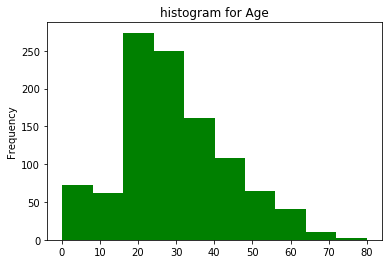

In [28]:
# Check age distribution
train_df2.Age.plot(kind='hist', title='histogram for Age', bins = 10, color='g');

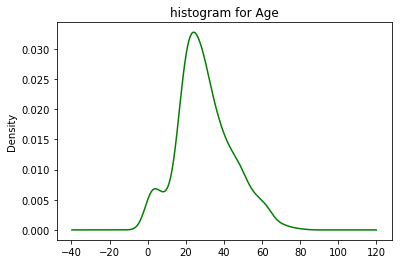

In [29]:
train_df2.Age.plot(kind='kde', title='histogram for Age',  color='g');

In [30]:
# Function to extract the title from the name 
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [31]:
# use map function to apply the function on each Name value row i
train_df2.Name.map(lambda x : GetTitle(x)) # alternatively you can use : df.Name.map(GetTitle)

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
         ...  
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [32]:
train_df2.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [33]:
# Function to extract the title from the name 
def GetTitle(name):
    title_group = {'mr' : 'Mr', 
                   'mrs' : 'Mrs', 
                   'miss' : 'Miss', 
                   'master' : 'Master',
                   'don' : 'Sir',
                   'rev' : 'Sir',
                   'dr' : 'Officer',
                   'mme' : 'Mrs',
                   'ms' : 'Mrs',
                   'major' : 'Officer',
                   'lady' : 'Lady',
                   'sir' : 'Sir',
                   'mlle' : 'Miss',
                   'col' : 'Officer',
                   'capt' : 'Officer',
                   'the countess' : 'Lady',
                   'jonkheer' : 'Sir',
                   'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [34]:
train_df2.Name.map(lambda x : GetTitle(x))

PassengerId
1           Mr
2          Mrs
3         Miss
4          Mrs
5           Mr
         ...  
1305        Mr
1306      Lady
1307        Mr
1308        Mr
1309    Master
Name: Name, Length: 1309, dtype: object

In [35]:
train_df2['Title'] = train_df2.Name.map(lambda x : GetTitle(x))

In [36]:
train_df2.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,isMother,Title
PassengerId,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,0,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,0,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,0,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,0,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,0,Mr


In [37]:
train_df2[train_df2.Age.notnull()].groupby('Title')['Age'].median()

Title
Lady       39.0
Master      4.0
Miss       22.0
Mr         29.0
Mrs        35.0
Officer    51.0
Sir        41.0
Name: Age, dtype: float64

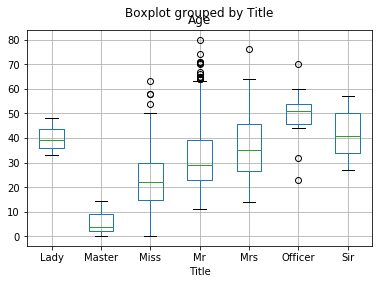

In [38]:
# Box plot of Age with title
train_df2[train_df2.Age.notnull()].boxplot('Age','Title');

In [39]:
# replace missing values
title_age_median = train_df2.groupby('Title').Age.transform('median')
title_age_median

PassengerId
1       29.0
2       35.0
3       22.0
4       35.0
5       29.0
        ... 
1305    29.0
1306    39.0
1307    29.0
1308    29.0
1309     4.0
Name: Age, Length: 1309, dtype: float64

In [40]:
train_df2.Age.fillna(title_age_median , inplace=True)
train_df2[train_df2.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,isMother,Title
PassengerId,,,,,,,,,,,,,


In [41]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 13 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
isMother    1309 non-null int32
Title       1309 non-null object
dtypes: float64(2), int32(1), int64(4), object(6)
memory usage: 138.1+ KB


### 2.c Cabin column - Fill missing value with a group by aggregation value (ie. mean/median etc.)

##### Cabin missing value treatment

In [42]:
train_df2[train_df2['Cabin'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,isMother,Title
PassengerId,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,0,Mr
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,0,Miss
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,0,Mr
6,29.0,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877,0,Mr
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909,0,Master
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,NaN,S,7.7750,"Henriksson, Miss. Jenny Lovisa",0,3,female,0,-888,347086,0,Miss
1305,29.0,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-888,A.5. 3236,0,Mr
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,-888,SOTON/O.Q. 3101262,0,Mr


In [43]:
train_df2[train_df2.Cabin.notnull()].Cabin.unique()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24

##### Explore the suspecious value

In [44]:
train_df2[train_df2.Cabin == 'T']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,isMother,Title
PassengerId,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,0,Mr


##### Assign null to this cabin value
A single cabin class 'T' for a single passenger! Sounds erronous value.

In [45]:
train_df2.loc[train_df2.Cabin == 'T', 'Cabin'] = np.NaN

In [46]:
def getCabinClass(cabin):
    return cabin[0]

In [47]:
train_df2['CabinClass'] = train_df2[train_df2.Cabin.notnull()].Cabin.map(getCabinClass)

In [48]:
train_df2['CabinClass'].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
Name: CabinClass, dtype: int64

In [49]:
pd.crosstab(train_df2[train_df2.Cabin.notnull()]['CabinClass'], train_df2[train_df2.Cabin.notnull()]['Title'])

Title,Lady,Master,Miss,Mr,Mrs,Officer,Sir
CabinClass,,,,,,,
A,1,1,2,14,1,2,1
B,1,2,17,24,18,3,0
C,1,1,17,43,28,4,0
D,0,0,8,23,14,1,0
E,0,2,9,20,10,0,0
F,0,3,4,10,4,0,0
G,0,0,3,0,2,0,0


##### The is a relation between CabinClass <---> Title

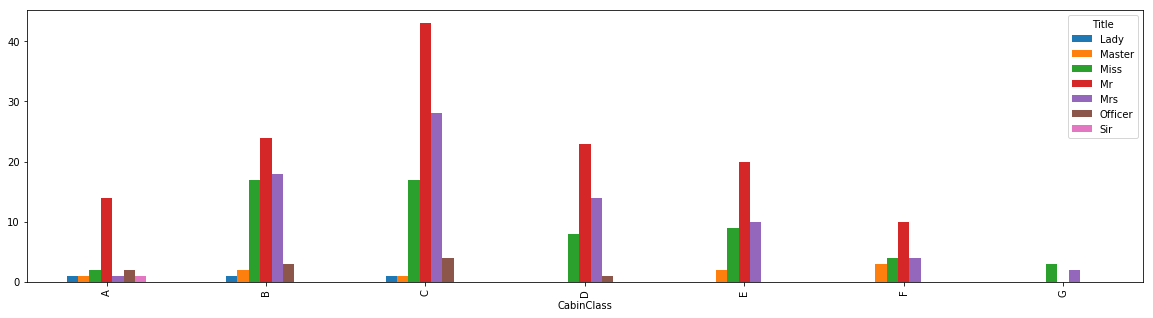

In [50]:
pd.crosstab(train_df2['CabinClass'], train_df2['Title']).plot(kind='bar', figsize=(20,5))

###### No relation

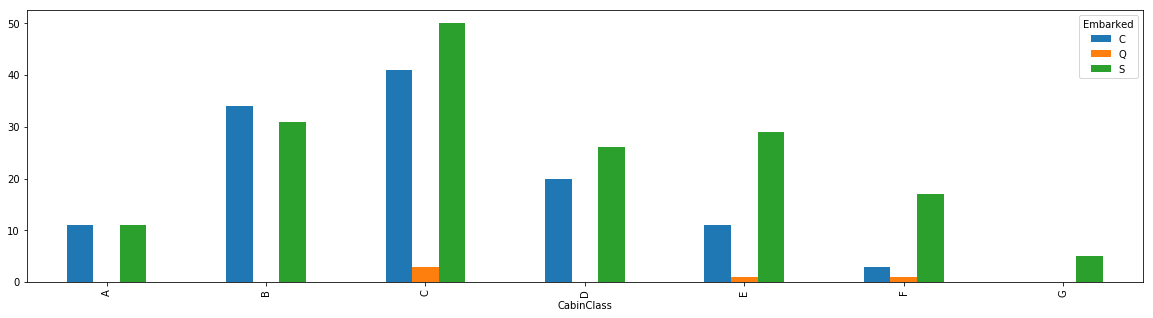

In [51]:
pd.crosstab(train_df2['CabinClass'], train_df2['Embarked']).plot(kind='bar', figsize=(20,5))

##### There is a relation between CabinClass <---> Pclass

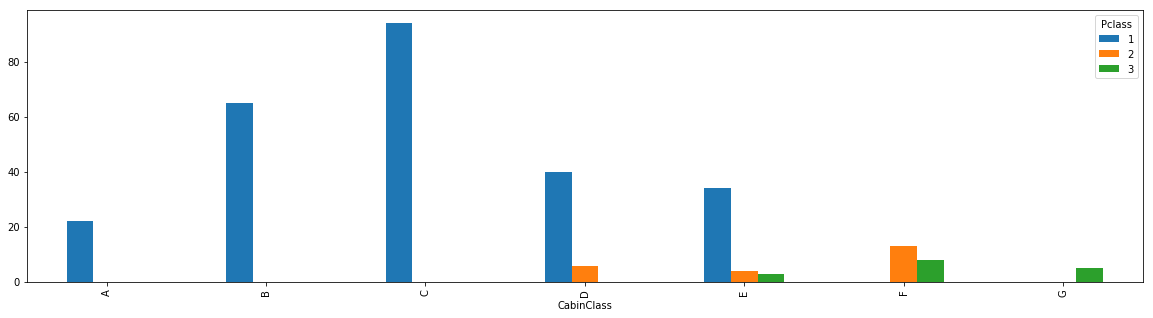

In [52]:
pd.crosstab(train_df2['CabinClass'], train_df2['Pclass']).plot(kind='bar', figsize=(20,5))

###### Investigating the Cabin has really the missing values
In the null CabinClass rows - there is a distribution of Title and Pclass available. So surely these as missing values.

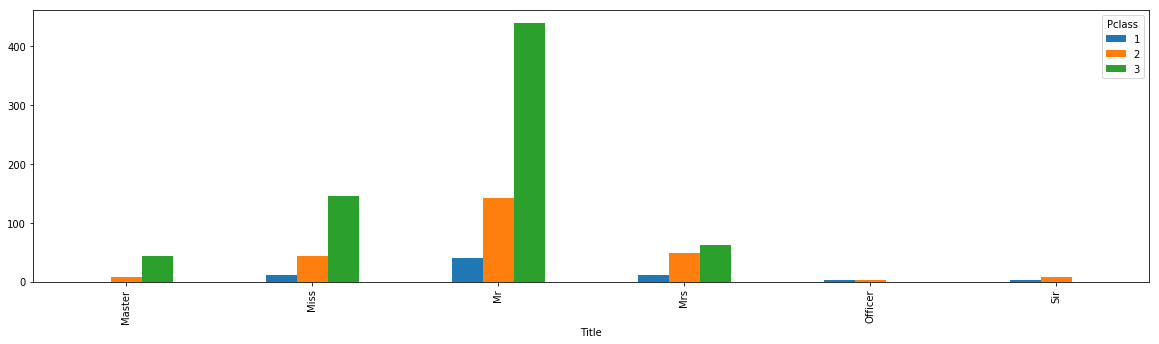

In [53]:
#train_df[train_df.Cabin.isnull()].CabinClass.plot(kind='bar', figsize=(20,5))
pd.crosstab(train_df2[train_df2.Cabin.isnull()].Title, train_df2[train_df2.Cabin.isnull()].Pclass).plot(kind='bar', figsize=(20,5))

Counts of Pclass and Title in the missing values of Cabin

In [54]:
train_df2[train_df2.Cabin.isnull()].groupby(['Pclass','Title']).Title.count()

Pclass  Title  
1       Miss        12
        Mr          40
        Mrs         11
        Officer      3
        Sir          2
                  ... 
2       Sir          8
3       Master      44
        Miss       146
        Mr         440
        Mrs         63
Name: Title, Length: 15, dtype: int64

Percentage of Pclass and Title in the missing values of Cabin

In [55]:
train_df2[train_df2.Cabin.isnull()].groupby(['Pclass' ]).Title.value_counts(normalize=True)

Pclass  Title  
1       Mr         0.588235
        Miss       0.176471
        Mrs        0.161765
        Officer    0.044118
        Sir        0.029412
                     ...   
2       Officer    0.007874
3       Mr         0.634921
        Miss       0.210678
        Mrs        0.090909
        Master     0.063492
Name: Title, Length: 15, dtype: float64

###### Convert the cabin class to integer value

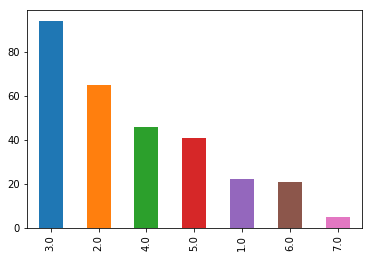

In [56]:
def getCabinClassInt(c):
    cabin_group = {'A' : 1, 
                   'B' : 2, 
                   'C' : 3, 
                   'D' : 4,
                   'E' : 5,
                   'F' : 6,
                   'G' : 7,
                   'T' : 8,
                  }
    
    return cabin_group[c]

train_df2['CabinClassInt'] = train_df2[train_df2.Cabin.notnull()].CabinClass.map(getCabinClassInt)
train_df2['CabinClassInt'].value_counts().plot(kind='bar')

##### Check the CabinClassInt has relation with fair

In [57]:
train_df2.groupby('CabinClassInt')['Fare'].median()

CabinClassInt
1.0    35.0771
2.0    82.2667
3.0    86.2896
4.0    52.5542
5.0    53.1000
6.0    13.0000
7.0    16.7000
Name: Fare, dtype: float64

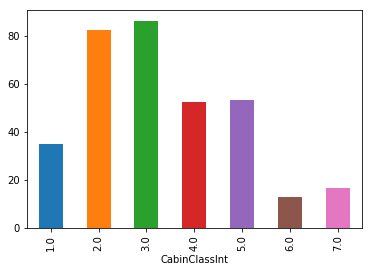

In [58]:
# pd.crosstab(train_df[train_df.CabinClassInt.notnull()]['CabinClassInt'],train_df[train_df.CabinClassInt.notnull()]['Fare'])
train_df2.groupby('CabinClassInt')['Fare'].median().plot(kind='bar')

Check Non-empty cabin distribution among the Title/Pclass

In [59]:
train_df2[train_df2.Cabin.notnull()].pivot_table(index='Title',columns = 'Pclass',values='CabinClassInt', aggfunc='mean')

Pclass,1,2,3
Title,,,
Lady,2.000000,NaN,NaN
Master,2.600000,6.000000,5.000000
Miss,2.980000,5.500000,6.750000
Mr,3.042017,4.857143,5.875000
Mrs,3.119403,5.285714,6.333333
Officer,2.400000,NaN,NaN
Sir,1.000000,NaN,NaN


In [60]:
train_df2[train_df2.Cabin.notnull()]['Title'].unique()

array(['Mrs', 'Mr', 'Miss', 'Master', 'Officer', 'Lady', 'Sir'],
      dtype=object)

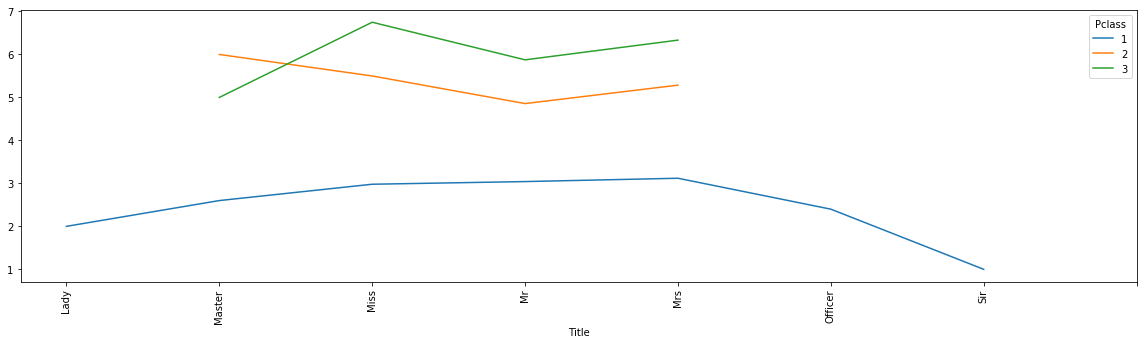

In [61]:
train_df2[train_df2.Cabin.notnull()].pivot_table(index='Title',columns = 'Pclass',values='CabinClassInt', aggfunc='mean').plot(rot=90, xticks= [0,1,2,3,4,5,6,7] , figsize = (20, 5))

Check Non-empty cabin distribution among the Title/Pclass - Make a dictionary

In [62]:
AvgCabinFor_Title_Pclass = train_df2[train_df2.Cabin.notnull()].groupby(['Title', 'Pclass']).CabinClassInt.mean().to_dict()
AvgCabinFor_Title_Pclass

{('Lady', 1): 2.0,
 ('Master', 1): 2.6,
 ('Master', 2): 6.0,
 ('Master', 3): 5.0,
 ('Miss', 1): 2.98,
 ('Miss', 2): 5.5,
 ('Miss', 3): 6.75,
 ('Mr', 1): 3.042016806722689,
 ('Mr', 2): 4.857142857142857,
 ('Mr', 3): 5.875,
 ('Mrs', 1): 3.1194029850746268,
 ('Mrs', 2): 5.285714285714286,
 ('Mrs', 3): 6.333333333333333,
 ('Officer', 1): 2.4,
 ('Sir', 1): 1.0}

In [63]:
AvgCabinFor_Title_Pclass = train_df2.groupby(['Title', 'Pclass']).CabinClassInt.median().to_dict()
AvgCabinFor_Title_Pclass

{('Lady', 1): 2.0,
 ('Master', 1): 2.0,
 ('Master', 2): 6.0,
 ('Master', 3): 5.0,
 ('Miss', 1): 3.0,
 ('Miss', 2): 5.5,
 ('Miss', 3): 7.0,
 ('Mr', 1): 3.0,
 ('Mr', 2): 4.0,
 ('Mr', 3): 6.0,
 ('Mrs', 1): 3.0,
 ('Mrs', 2): 6.0,
 ('Mrs', 3): 7.0,
 ('Officer', 1): 2.5,
 ('Officer', 2): nan,
 ('Sir', 1): 1.0,
 ('Sir', 2): nan}

###### Fill null with avg CabinClassInt of (Title and Pclass) group 

In [64]:
train_df2['CabinClassInt'].fillna(train_df2.groupby(['Title', 'Pclass']).CabinClassInt.transform('median'), inplace=True)

In [65]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 15 columns):
Age              1309 non-null float64
Cabin            294 non-null object
Embarked         1309 non-null object
Fare             1308 non-null float64
Name             1309 non-null object
Parch            1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
SibSp            1309 non-null int64
Survived         1309 non-null int64
Ticket           1309 non-null object
isMother         1309 non-null int32
Title            1309 non-null object
CabinClass       294 non-null object
CabinClassInt    1299 non-null float64
dtypes: float64(3), int32(1), int64(4), object(7)
memory usage: 158.5+ KB


In [66]:
train_df2['CabinClassInt'] = train_df2['CabinClassInt'].apply(np.floor)

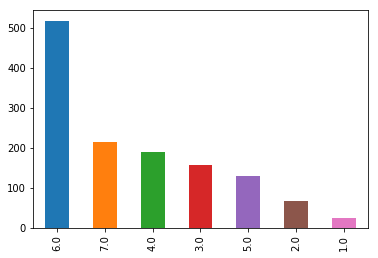

In [67]:
train_df2['CabinClassInt'].value_counts().plot(kind='bar')

In [68]:
#train_df['PclassNTitle'] =  train_df.apply(lambda x: (x.Title, x.Pclass), axis=1)

###### Check the CabinClassInt distribution in Title

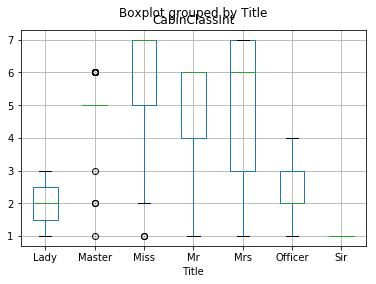

In [69]:
train_df2.boxplot('CabinClassInt', 'Title')

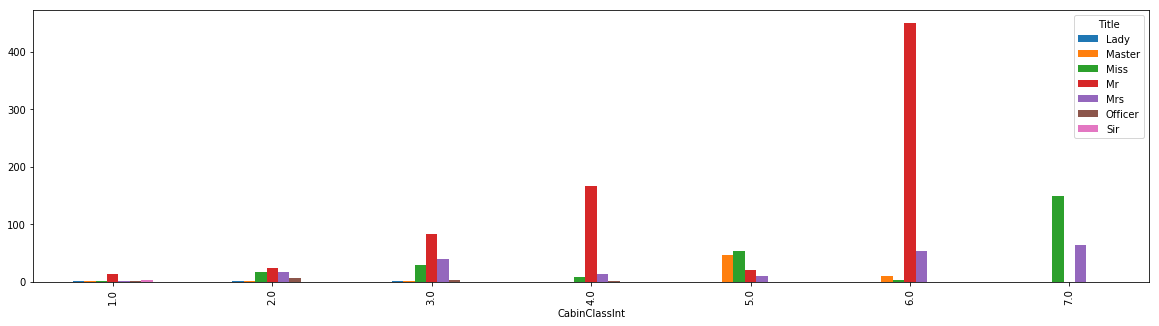

In [70]:
pd.crosstab(train_df2['CabinClassInt'], train_df2['Title']).plot(kind='bar', figsize=(20,5))

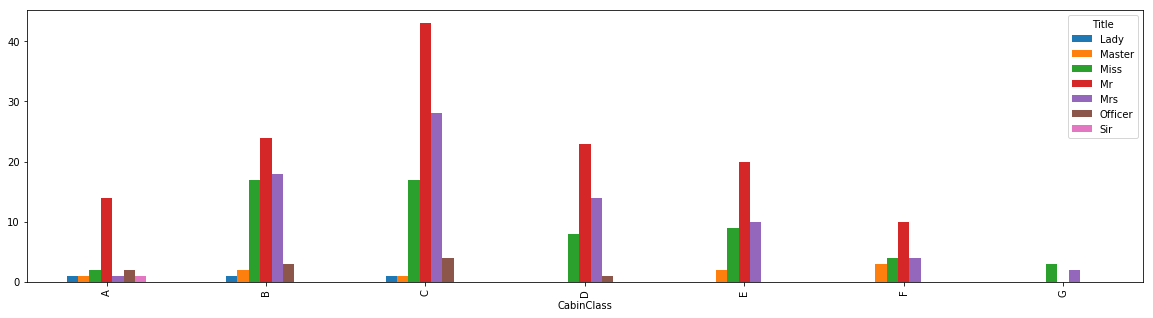

In [71]:
pd.crosstab(train_df2['CabinClass'], train_df2['Title']).plot(kind='bar', figsize=(20,5))

In [72]:
train_df2['CabinClassInt'].fillna(train_df2.groupby(['Pclass']).CabinClassInt.transform('median'), inplace=True)

In [73]:
train_df2['CabinClassInt'] = train_df2['CabinClassInt'].apply(np.floor)

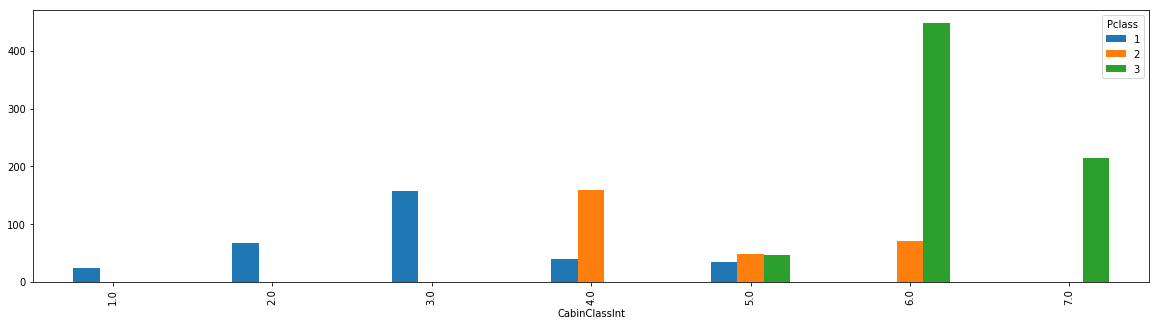

In [74]:
pd.crosstab(train_df2['CabinClassInt'], train_df2['Pclass']).plot(kind='bar', figsize=(20,5))

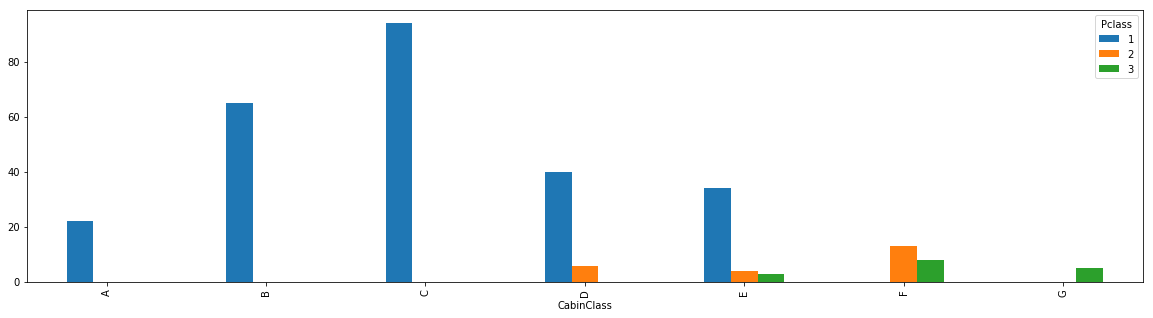

In [75]:
pd.crosstab(train_df2['CabinClass'], train_df2['Pclass']).plot(kind='bar', figsize=(20,5))

In [76]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 15 columns):
Age              1309 non-null float64
Cabin            294 non-null object
Embarked         1309 non-null object
Fare             1308 non-null float64
Name             1309 non-null object
Parch            1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
SibSp            1309 non-null int64
Survived         1309 non-null int64
Ticket           1309 non-null object
isMother         1309 non-null int32
Title            1309 non-null object
CabinClass       294 non-null object
CabinClassInt    1309 non-null float64
dtypes: float64(3), int32(1), int64(4), object(7)
memory usage: 158.5+ KB


### 2.d Fare column - Fill missing value with a group by aggregation value (ie. mean/median etc.)


In [77]:
train_df2[train_df2['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,isMother,Title,CabinClass,CabinClassInt
PassengerId,,,,,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701,0,Mr,NaN,6.0


In [78]:
train_df2[(train_df2['Title'] == 'Mr') & (train_df2['Age'] > 50)].groupby(['Title', 'Pclass', 'Embarked' ]).Fare.median()

Title  Pclass  Embarked
Mr     1       C           61.37920
               S           32.91040
       2       Q           11.01875
               S           13.25000
       3       Q            7.75000
               S            7.75000
Name: Fare, dtype: float64

In [79]:
train_df2[(train_df2['Title'] == 'Mr')].groupby(['Title', 'Pclass', 'Embarked' ]).Fare.median()

Title  Pclass  Embarked
Mr     1       C           71.28330
               S           35.25000
       2       C           15.04580
               Q           11.52915
               S           13.00000
       3       C            7.22920
               Q            7.75000
               S            7.92500
Name: Fare, dtype: float64

In [80]:
temp_df = train_df2.groupby(['Title', 'Pclass', 'Embarked' ]).Fare.transform('median')
temp_df

PassengerId
1        7.9250
2       80.0000
3        9.8250
4       58.5000
5        7.9250
         ...   
1305     7.9250
1306    74.2500
1307     7.9250
1308     7.9250
1309    15.2458
Name: Fare, Length: 1309, dtype: float64

In [81]:
temp_df[1044]

7.925

In [82]:
train_df2.Fare.fillna(train_df2.groupby(['Title', 'Pclass', 'Embarked' ]).Fare.transform('median'), inplace=True)

In [83]:
train_df2.iloc[1043:1044,:]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,isMother,Title,CabinClass,CabinClassInt
PassengerId,,,,,,,,,,,,,,,
1044,60.5,NaN,S,7.925,"Storey, Mr. Thomas",0,3,male,0,-888,3701,0,Mr,NaN,6.0


### 2.e Missing Values prediction
##### Another way to fill missing values is using prediction algo(ie. tree, NN etc.) on excsting values to predict missing values. (The Best Way)

## 3. Outlier detection

##### Age

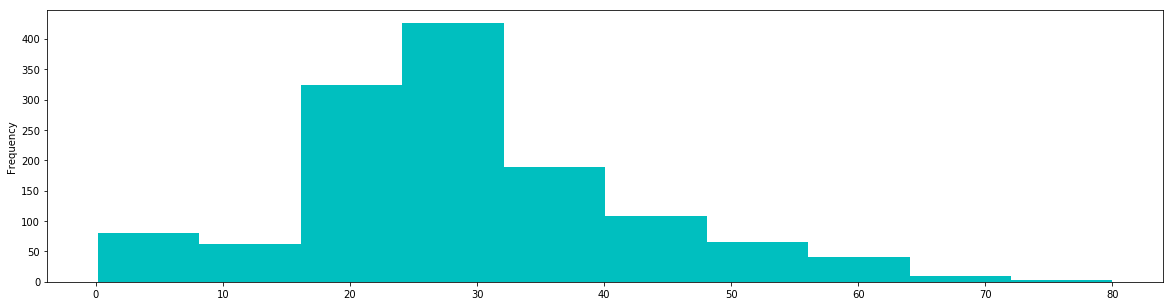

In [84]:
train_df2['Age'].plot(kind='hist', bins=10, color='c', figsize=(20,5))

###### Investigate the outlierages

In [85]:
train_df2.loc[train_df2['Age']>70,:]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,isMother,Title,CabinClass,CabinClassInt
PassengerId,,,,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,0,Mr,A,1.0
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,0,Mr,NaN,6.0
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,0,Mr,NaN,3.0
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,0,Mr,A,1.0
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,0,Mr,NaN,6.0
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,0,Mrs,C,3.0


##### Fare

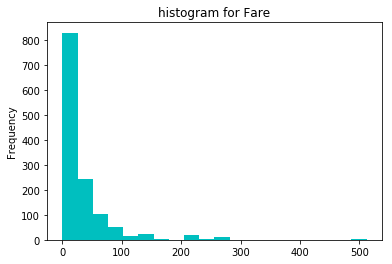

In [86]:
# histogram for fare
train_df2.Fare.plot(kind='hist', title='histogram for Fare', bins=20, color='c');

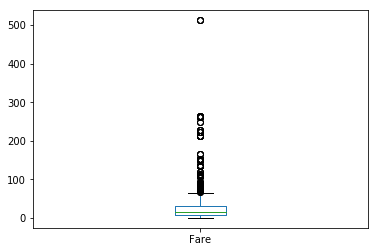

In [87]:
# box plot to indentify outliers 
train_df2.Fare.plot(kind='box');

###### Investigate the outlierages

In [88]:
train_df2.loc[train_df2['Fare'] == train_df2['Fare'].max(),:]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,isMother,Title,CabinClass,CabinClassInt
PassengerId,,,,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,0,Miss,NaN,3.0
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,0,Mr,B,2.0
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,0,Mr,B,2.0
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,1,Mrs,B,2.0


##### Transformations to reduce the skewness

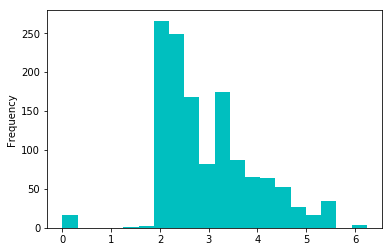

In [89]:
LogFare = np.log(train_df2.Fare + 1.0) # Adding 1 to accomodate zero fares : log(0) is not defined
# Histogram of LogFare
LogFare.plot(kind='hist', color='c', bins=20);

##### Discretization / Binning

In [90]:
train_df2['Fare_Bin'] = pd.qcut(train_df2['Fare'], 10, labels = ['low1','low2','low3','low4','low5','high1','high2','high3','high4','high5'])

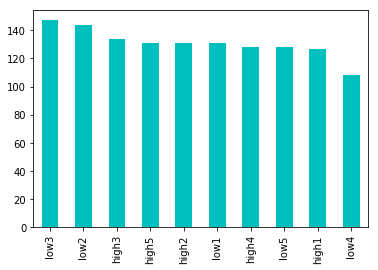

In [91]:
train_df2['Fare_Bin'].value_counts().plot(kind='bar', color='c', rot=90)

## 4. Feature Engineering

### 4.a Feature Creation - Adult / Child

In [92]:
train_df2['AdultOrChild'] = np.where(train_df2['Age'] > 18, 'Adult', 'Child')
train_df2['AdultOrChild'].value_counts()

Adult    1108
Child     201
Name: AdultOrChild, dtype: int64

Survival change for the Child is high

In [93]:
pd.crosstab(train_df2[train_df2['Survived']!= -888]['AdultOrChild'], train_df2[train_df2['Survived']!= -888]['Survived'], normalize='index')

Survived,0,1
AdultOrChild,,
Adult,0.639037,0.360963
Child,0.496503,0.503497


##### Feature Creation - FamilySize

In [94]:
# Family : Adding Parents with Siblings
train_df2['FamilySize'] = train_df2.Parch + train_df2.SibSp + 1 # 1 for self

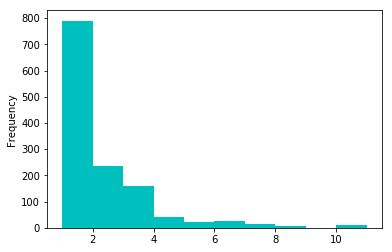

In [95]:
# explore the family feature
train_df2['FamilySize'].plot(kind='hist', color='c');

In [96]:
# further explore this family with max family members
train_df2.loc[train_df2.FamilySize == train_df2.FamilySize.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,isMother,Title,CabinClass,CabinClassInt,Fare_Bin,AdultOrChild,FamilySize
PassengerId,,,,,,,,,,,,,,,,,,
160,4.0,NaN,S,69.55,"Sage, Master. Thomas Henry",2,3,male,8,0,CA. 2343,0,Master,NaN,5.0,high4,Child,11
181,22.0,NaN,S,69.55,"Sage, Miss. Constance Gladys",2,3,female,8,0,CA. 2343,0,Miss,NaN,7.0,high4,Adult,11
202,29.0,NaN,S,69.55,"Sage, Mr. Frederick",2,3,male,8,0,CA. 2343,0,Mr,NaN,6.0,high4,Adult,11
325,29.0,NaN,S,69.55,"Sage, Mr. George John Jr",2,3,male,8,0,CA. 2343,0,Mr,NaN,6.0,high4,Adult,11
793,22.0,NaN,S,69.55,"Sage, Miss. Stella Anna",2,3,female,8,0,CA. 2343,0,Miss,NaN,7.0,high4,Adult,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,22.0,NaN,S,69.55,"Sage, Miss. Dorothy Edith ""Dolly""",2,3,female,8,0,CA. 2343,0,Miss,NaN,7.0,high4,Adult,11
1080,22.0,NaN,S,69.55,"Sage, Miss. Ada",2,3,female,8,-888,CA. 2343,0,Miss,NaN,7.0,high4,Adult,11
1234,29.0,NaN,S,69.55,"Sage, Mr. John George",9,3,male,1,-888,CA. 2343,0,Mr,NaN,6.0,high4,Adult,11


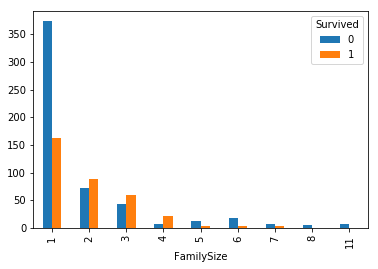

In [97]:
pd.crosstab( train_df2[train_df2['Survived']!= -888].FamilySize, train_df2[train_df2['Survived']!= -888].Survived).plot(kind='bar')

##### Feature : IsMother

Already implemented above

### 4.b Feature encoding

#### 4.b.1 Binary Encoding

In [98]:
train_df2['IsMale'] = np.where(train_df2['Sex'] == 'male', 1, 0)
train_df2['IsAdultOrChild'] = np.where(train_df2['AdultOrChild'] == 'Adult', 1, 0)

#### 4.b.2 Label Encoding - when there is intransic order in the categories

In [99]:
# 'Pclass', 'Fare_bin'
train_df2["Fare_Bin"] = train_df2["Fare_Bin"].astype('category')
train_df2["Fare_Bin_cat"] = train_df2["Fare_Bin"].cat.codes


#### 4.b.2 One-Hot-Encoding Encoding - when there is NO intransic order in the categories

In [100]:
# columns Deck, Pclass, Title, AgeState
train_df2 = pd.get_dummies(train_df2,columns=['Title', 'Embarked'])

In [101]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 29 columns):
Age               1309 non-null float64
Cabin             294 non-null object
Fare              1309 non-null float64
Name              1309 non-null object
Parch             1309 non-null int64
Pclass            1309 non-null int64
Sex               1309 non-null object
SibSp             1309 non-null int64
Survived          1309 non-null int64
Ticket            1309 non-null object
isMother          1309 non-null int32
CabinClass        294 non-null object
CabinClassInt     1309 non-null float64
Fare_Bin          1309 non-null category
AdultOrChild      1309 non-null object
FamilySize        1309 non-null int64
IsMale            1309 non-null int32
IsAdultOrChild    1309 non-null int32
Fare_Bin_cat      1309 non-null int8
Title_Lady        1309 non-null uint8
Title_Master      1309 non-null uint8
Title_Miss        1309 non-null uint8
Title_Mr          1309 non-null uint8
Title_M

In [102]:
train_df2.drop(['AdultOrChild', 'Cabin', 'CabinClass', 'Name', 'Ticket', 'Fare_Bin', 'Sex'], axis=1, inplace=True)
# train_df2.drop(['AdultOrChild','Cabin','CabinClass', 'CabinClassInt','Name','Ticket','Fare_Bin','Sex'], axis=1, inplace=True)

In [103]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 22 columns):
Age               1309 non-null float64
Fare              1309 non-null float64
Parch             1309 non-null int64
Pclass            1309 non-null int64
SibSp             1309 non-null int64
Survived          1309 non-null int64
isMother          1309 non-null int32
CabinClassInt     1309 non-null float64
FamilySize        1309 non-null int64
IsMale            1309 non-null int32
IsAdultOrChild    1309 non-null int32
Fare_Bin_cat      1309 non-null int8
Title_Lady        1309 non-null uint8
Title_Master      1309 non-null uint8
Title_Miss        1309 non-null uint8
Title_Mr          1309 non-null uint8
Title_Mrs         1309 non-null uint8
Title_Officer     1309 non-null uint8
Title_Sir         1309 non-null uint8
Embarked_C        1309 non-null uint8
Embarked_Q        1309 non-null uint8
Embarked_S        1309 non-null uint8
dtypes: float64(3), int32(3), int64(5), int8(1), uin

#### Reorder columns

In [104]:
# reorder columns
columns = [column for column in train_df2.columns if column != 'Survived']
columns = ['Survived'] + columns
train_df2 = train_df2[columns]

In [105]:
train_df2.shape

(1309, 22)

In [106]:
train_XY = train_df2[train_df2['Survived']!= -888]

train_Y = train_XY.loc[:,'Survived']
train_X = train_XY.loc[:,'Age':]

print(train_X.shape)
print(train_Y.shape)

(891, 21)
(891,)


In [107]:
test_XY = train_df2[train_df2['Survived'] == -888]

# test_Y = train_XY.loc[:,'Survived']
test_X = test_XY.loc[:,'Age':]

print(test_X.shape)
#print(train_Y.shape)

(418, 21)


In [108]:
# X = train_df.loc[:,'Pclass':].values.astype('float')
# y = train_df['Survived'].ravel()

#X = train_df.iloc[:,1:] 
#Y = train_df.iloc[:,0]

## Model preparation
### Linear Models

In [109]:
#from xgboost import XGBClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [110]:
seed = 0 #7 
test_size = 0.10

X_train, X_valid, Y_train, Y_valid = train_test_split(train_X, train_Y, test_size=test_size, random_state=seed)

In [112]:
X_train.shape
# X_valid.shape

(801, 21)

In [115]:
from sklearn.model_selection import GridSearchCV

model_lr = LogisticRegression(random_state=0)
parameters = {'C':[1.0, 10.0, 50.0, 100.0, 1000.0], 'penalty' : ['l1','l2']}
model = GridSearchCV(model_lr, param_grid=parameters, cv=10)



In [116]:
model.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: 

C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: 

C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: 

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1.0, 10.0, 50.0, 100.0, 1000.0], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [117]:
# model.cv_results_
# model.best_estimator_ 
# model.best_params_
# model.best_score_

In [118]:
y_pred = model.predict(X_train) 
predictions = [round(value) for value in y_pred] 

accuracy = accuracy_score(Y_train, predictions) 
print("Accuracy : %.2f%%" % (accuracy * 100.0))

precision = precision_score(Y_train, predictions) 
print("Precision: %.2f%%" % (precision * 100.0))

recall = recall_score(Y_train, predictions) 
print("Recall   : %.2f%%" % (recall * 100.0))

Accuracy : 83.27%
Precision: 79.24%
Recall   : 75.58%


In [119]:
y_pred = model.predict(X_valid) 
predictions = [round(value) for value in y_pred] 

accuracy = accuracy_score(Y_valid, predictions) 
print("Accuracy : %.2f%%" % (accuracy * 100.0))

precision = precision_score(Y_valid, predictions) 
print("Precision: %.2f%%" % (precision * 100.0))

recall = recall_score(Y_valid, predictions) 
print("Recall   : %.2f%%" % (recall * 100.0))

Accuracy : 84.44%
Precision: 82.05%
Recall   : 82.05%


### Plot Feature Importance

In [120]:
# import xgboost as xgb
# import matplotlib.pyplot as plt
# xgb.plot_importance(model)
# plt.rcParams['figure.figsize'] = [5, 5]
# plt.show()

### Predict the submission test

In [121]:
X_train1, _ , Y_train1, _ = train_test_split(train_X, train_Y, test_size=0.0, random_state=0)
model.fit(X_train1, Y_train1)
y_test_pred = model.predict(test_X) 

C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: 

C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: 

C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jupyter-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: 

In [122]:
y_test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [123]:
df_kgl_submit = pd.DataFrame({'PassengerId': test_X.index, 'Survived' : y_test_pred} )

In [124]:
df_kgl_submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [125]:
 df_kgl_submit.to_csv('7st_submit.csv', index=False)